<a href="https://colab.research.google.com/github/jazmichewcam/EDP1/blob/main/Metodo%20de%20Nicolson%20Jaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Método implicíto de Cranck Nicholson**


Consideremos la ecuación de calor unidimensional:
$$ \frac{\partial u}{\partial t} - \alpha^2 \frac{\partial^2 u}{\partial x^2} = 0 $$

Con los parámetros y condiciones:
- Coeficiente de difusividad térmica: $\alpha = 1$
- Dominio espacial: $0 < x < 1$
- Dominio temporal: $0 < t$
- Condiciones de frontera: $u(0,t) = u(1,t) = 0$ (extremos a temperatura cero)
- Condición inicial: $u(x,0) = 1 - 4\left(x - \frac{1}{2}\right)^2$

Para la implementación numérica, emplearemos la relación:
$$ r = \frac{\alpha^2 k}{h^2} $$

In [ ]:
# Importación de librerías para cálculo simbólico, numérico y visualización
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt  # Librería para creación de gráficos y visualizaciones
from tabulate import tabulate  # Función específica para formatear datos en tablas (ejercicio 1)

import math  # Librería matemática estándar de Python (funciones básicas y solución exacta)

In [ ]:

# Datos del problema físico y numérico
alpha = 1.0  # Coeficiente de difusividad térmica
h = 1/10     # Tamaño del paso espacial (delta x) - la barra se divide en 10 segmentos
k = 0.01     # Tamaño del paso temporal (delta t)
r = alpha**2 * k / h**2  # Parámetro de estabilidad numérica para el método de diferencias finitas

# Validación del parámetro de estabilidad
print(f"Parámetro de estabilidad r = {r:.4f}")


# Generación de puntos en el dominio espacial [0, 1]
x = np.arange(0, 1 + h, h)  # Puntos: 0, 0.1, 0.2, ..., 1.0 (incluye extremos)
x_in = x[1:-1]     # Puntos interiores (excluye los extremos x=0 y x=1)
n = len(x_in)      # Número de puntos interiores (determina la dimensión del sistema)

print(f"Puntos totales: {len(x)}, Puntos interiores: {n}")
print(f"Puntos interiores: {x_in}")

def u_izq(t): #condicion de forntera en el extremo izquierdo

    return 0.0

def u_der(t): #condicion de forntera en el extremo derecho

    return 0.0


def u0_func(x): #distribucion inicial de temperatura en la barra

    return 1 - 4*(x - 0.5)**2

# Evaluación de la condición inicial en los puntos interiores
f = u0_func(x_in)  # Vector de condiciones iniciales para los puntos interiores

# Verificación de la condición inicial
print(f"Condición inicial en puntos interiores: {f}")
print(f"Valor máximo de temperatura inicial: {np.max(f):.4f}")

In [ ]:
# =============================================================================
# IMPLEMENTACIÓN DEL MÉTODO DE CRANK-NICOLSON
# =============================================================================

def matrices_crank_nicolson(n, r):

    # Inicializar matrices n x n llenas de ceros usando sympy
    A = sp.zeros(n, n)  # Matriz del sistema para el nuevo tiempo (n+1)
    B = sp.zeros(n, n)  # Matriz para el tiempo actual (n)

    # Construcción de las matrices tridiagonales
    for i in range(n):
        # Diagonal principal
        A[i, i] = 1 + r    # Elementos de la diagonal de A
        B[i, i] = 1 - r    # Elementos de la diagonal de B

        # Subdiagonal inferior (elementos [i, i-1])
        if i > 0:
            A[i, i-1] = -r/2  # Coeficiente para el punto i-1 en A
            B[i, i-1] =  r/2  # Coeficiente para el punto i-1 en B

        # Subdiagonal superior (elementos [i, i+1])
        if i < n-1:
            A[i, i+1] = -r/2  # Coeficiente para el punto i+1 en A
            B[i, i+1] =  r/2  # Coeficiente para el punto i+1 en B

    return A, B

# Generar las matrices A y B para el método de Crank-Nicolson
AC, BC = matrices_crank_nicolson(n, r)

print(f"Matriz A (Crank-Nicolson) - dimensión {AC.shape}:")
print(AC)
print(f"\nMatriz B (Crank-Nicolson) - dimensión {BC.shape}:")
print(BC)
print(f"\nParámetro r utilizado: {r:.4f}")

# Verificación de propiedades de las matrices
print(f"\nLa matriz A es tridiagonal: {es_tridiagonal(AC)}")
print(f"La matriz B es tridiagonal: {es_tridiagonal(BC)}")

# Función auxiliar para verificar si una matriz es tridiagonal
def es_tridiagonal(matriz):

    n = matriz.rows
    for i in range(n):
        for j in range(n):
            # Si el elemento está fuera de la banda tridiagonal y no es cero
            if abs(i - j) > 1 and matriz[i, j] != 0:
                return False
    return True

In [ ]:
AC

Matrix([
[ 2.0, -0.5,    0,    0,    0,    0,    0,    0,    0],
[-0.5,  2.0, -0.5,    0,    0,    0,    0,    0,    0],
[   0, -0.5,  2.0, -0.5,    0,    0,    0,    0,    0],
[   0,    0, -0.5,  2.0, -0.5,    0,    0,    0,    0],
[   0,    0,    0, -0.5,  2.0, -0.5,    0,    0,    0],
[   0,    0,    0,    0, -0.5,  2.0, -0.5,    0,    0],
[   0,    0,    0,    0,    0, -0.5,  2.0, -0.5,    0],
[   0,    0,    0,    0,    0,    0, -0.5,  2.0, -0.5],
[   0,    0,    0,    0,    0,    0,    0, -0.5,  2.0]])

In [ ]:
BC

Matrix([
[2.22044604925031e-16,                  0.5,                    0,                    0,                    0,                    0,                    0,                    0,                    0],
[                 0.5, 2.22044604925031e-16,                  0.5,                    0,                    0,                    0,                    0,                    0,                    0],
[                   0,                  0.5, 2.22044604925031e-16,                  0.5,                    0,                    0,                    0,                    0,                    0],
[                   0,                    0,                  0.5, 2.22044604925031e-16,                  0.5,                    0,                    0,                    0,                    0],
[                   0,                    0,                    0,                  0.5, 2.22044604925031e-16,                  0.5,                    0,                    0,               

In [ ]:
def crank_nicolson(A, B, f, m):


    # Lista para almacenar la solución en cada paso de tiempo
    S = []

    # Convertir las condiciones iniciales a matriz de SymPy para operaciones simbólicas
    u = sp.Matrix(f)   # Vector de estado inicial (u en tiempo t=0)

    # Iterar sobre todos los pasos de tiempo (incluye el tiempo inicial)
    for j in range(m+1):
        # Almacenar la solución actual en el formato NumPy
        # reshape(-1) asegura que sea un array 1D
        S.append(np.array(u, dtype=float).reshape(-1))

        # Construir el lado derecho del sistema lineal: b = B * u_n
        b = B * u

        # Resolver el sistema lineal A * u_{n+1} = b usando descomposición LU
        # Esto avanza la solución un paso en el tiempo
        u = A.LUsolve(b)

    # Convertir la lista de soluciones a array NumPy para manipulación posterior
    return np.array(S)


# Tiempo máximo de simulación
t_max = 0.10

# Calcular el número de pasos temporales necesarios
# m = número total de pasos (no incluye el tiempo inicial como paso)
m = int(t_max / k)

# Ejecutar el método de Crank-Nicolson
# U es una matriz donde:
# - Filas: diferentes tiempos (desde t=0 hasta t=t_max)
# - Columnas: diferentes posiciones espaciales (puntos interiores)
U = crank_nicolson(AC, BC, f, m)   # U tiene tamaño (m+1) x n

**EJERCICIO 1**

In [ ]:
# =============================================================================
# EJERCICIO 1: CONSTRUCCIÓN DE TABLA DE RESULTADOS
# =============================================================================

# Generar vector de valores temporales desde 0 hasta t_max, con paso k
# k/2 se usa para evitar errores de precisión al incluir el valor final
t_vals = np.arange(0, t_max + k/2, k)   # Valores: 0, 0.01, 0.02, ..., 0.10

# Número de puntos espaciales a mostrar en la tabla (primeros 5 puntos)
xs = 5

# Inicializar lista para almacenar los datos de la tabla
tabla = []

# Iterar sobre cada instante de tiempo
for j, t in enumerate(t_vals):
    # Crear una nueva fila para el tiempo actual
    fila = [t]        # Primera columna: valor del tiempo

    # Agregar condición de frontera izquierda (x = 0, temperatura siempre 0)
    fila.append(0.0)  # Segunda columna: u(0,t) = 0.0

    # Agregar los valores de temperatura para los primeros xs puntos interiores
    for i in range(xs):
        # U[j, i] contiene la temperatura en el tiempo j y posición interior i
        fila.append(U[j, i])

    # Añadir la fila completa a la tabla
    tabla.append(fila)

# Definir encabezados de la tabla
# "t": tiempo, "x = 0.0": extremo izquierdo, luego posiciones interiores
encabezados = ["t", "x = 0.0", "0.1", "0.2", "0.3", "0.4", "0.5"]

# Imprimir tabla formateada
print(tabulate(tabla, headers=encabezados,
               tablefmt="github", floatfmt=".4f"))
# tablefmt="github": formato compatible con Markdown de GitHub
# floatfmt=".4f": mostrar números flotantes con 4 decimales


|      t |   x = 0.0 |    0.1 |    0.2 |    0.3 |    0.4 |    0.5 |
|--------|-----------|--------|--------|--------|--------|--------|
| 0.0000 |    0.0000 | 0.3600 | 0.6400 | 0.8400 | 0.9600 | 1.0000 |
| 0.0100 |    0.0000 | 0.3014 | 0.5657 | 0.7615 | 0.8804 | 0.9202 |
| 0.0200 |    0.0000 | 0.2676 | 0.5048 | 0.6885 | 0.8030 | 0.8417 |
| 0.0300 |    0.0000 | 0.2399 | 0.4548 | 0.6231 | 0.7300 | 0.7665 |
| 0.0400 |    0.0000 | 0.2164 | 0.4110 | 0.5646 | 0.6626 | 0.6963 |
| 0.0500 |    0.0000 | 0.1958 | 0.3721 | 0.5117 | 0.6011 | 0.6319 |
| 0.0600 |    0.0000 | 0.1773 | 0.3372 | 0.4639 | 0.5452 | 0.5731 |
| 0.0700 |    0.0000 | 0.1607 | 0.3056 | 0.4206 | 0.4943 | 0.5197 |
| 0.0800 |    0.0000 | 0.1457 | 0.2771 | 0.3813 | 0.4482 | 0.4713 |
| 0.0900 |    0.0000 | 0.1321 | 0.2512 | 0.3457 | 0.4064 | 0.4273 |
| 0.1000 |    0.0000 | 0.1197 | 0.2277 | 0.3135 | 0.3685 | 0.3875 |


**EJERCICIO 2**


Comparamos la solución exacta junto con la numerica y la expresamos en grafica.


In [ ]:
# =============================================================================
# SOLUCIÓN EXACTA DE LA ECUACIÓN DE CALOR
# =============================================================================

def u_ex(x, t, N=201):

    # Inicializar la suma de la serie
    s = 0.0

    # Sumar los primeros N términos impares de la serie de Fourier
    for k in range(N):
        n = 2*k + 1  # Solo términos impares: n = 1, 3, 5, ...

        # Coeficiente de Fourier b_n para la condición inicial parabólica
        # Calculado analíticamente mediante integración
        b_n = 32.0 / (math.pi**3 * n**3)

        termino = b_n * math.exp(-(n*math.pi)**2 * t) * math.sin(n*math.pi * x)

        s += termino

    return s




In [ ]:
# Crear matriz para almacenar la solución exacta con las mismas dimensiones que la solución numérica U
U_ex = np.zeros_like(U)

# Calcular la solución exacta en cada punto de la malla (tiempo, espacio)
for j, t in enumerate(t_vals):      # Iterar sobre cada instante de tiempo
    for i, xi in enumerate(x_in):   # Iterar sobre cada punto interior espacial
        # Evaluar la solución exacta en el punto (xi, t) y almacenar
        U_ex[j, i] = u_exact(xi, t)

# Calcular el error absoluto entre la solución numérica y la exacta
# |U - U_ex| da la magnitud del error en cada punto de la malla
error = np.abs(U - U_ex)

# Encontrar el máximo error en toda la simulación (en todos los tiempos y posiciones)
error_max = np.max(error)

# Definir un tiempo específico para realizar comparaciones detalladas
t_obj = 0.10

# Calcular el índice correspondiente al tiempo objetivo en los arreglos temporales
# round() asegura obtener el índice más cercano al tiempo deseado
j_obj = int(round(t_obj / k))

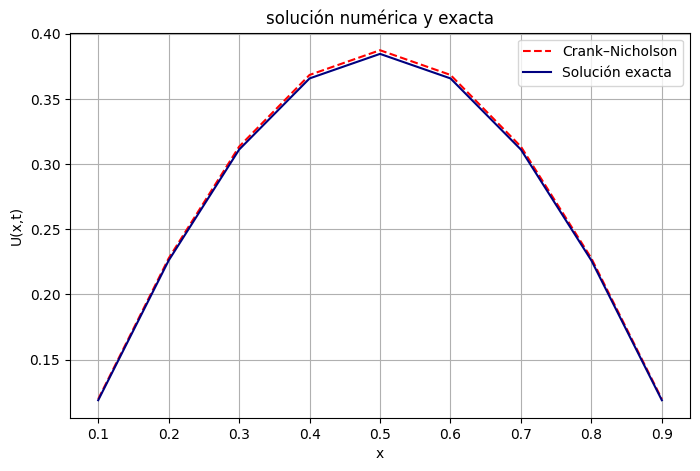

In [ ]:
# Construimos la gráfica donde comparamos
# la solución numerica y la exacta

plt.figure(figsize=(8,5))
plt.plot(x_in, U[j_obj, :], '--', color='red' ,label='Crank–Nicholson')
plt.plot(x_in, U_exact[j_obj, :], color='navy' ,label='Solución exacta')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title('solución numérica y exacta')
plt.grid(True)
plt.legend()
plt.show()

